### Import library and locate txt files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import numpy as np
import os
import glob
import re

In [ ]:
# path = r'F:\OneDrive - University of Toronto\chemical vehicle\22-23\color sensor\longitudinal data analysis\data' # use your path
path = r'data' 
all_files_path = glob.glob(os.path.join(path, "*.txt"))
all_files_path # print all file locations to double check

### Import data

In [25]:
# Unit test code for trail No. < 16
file_path = 'data\\6.txt'
df_cb = []

file_name = int(re.search('[\w-]+?(?=\.)', file_path).group()) # add Trail column so 
df = pd.read_csv(file_path, sep = " ", header = None, engine='python') # import txt file, sepearate each row into columns by " "

df.columns = ["R", "G", "B", "C", "cur_avg", "prev_avg", "read_idx", "Time", "NaN"] # Assign column name to each column
Measured_time = float(df[df["R"] == "Measured"]["B"])
df.insert(9, "Measured_time", Measured_time)
df = df.drop(df[df.R == "Measured"].index)

df.R = pd.to_numeric(df.R.str[2:]) # remove the first n character of each entry and convert the cell type into integer
df.G = pd.to_numeric(df.G.str[2:]) 
df.B = pd.to_numeric(df.B.str[2:])
df.C =pd.to_numeric( df.C.str[2:])
df.Time = pd.to_numeric(df.Time.str[5:])
df.insert(0, "trial", file_name)
df_cb.append(df)

In [ ]:
# Unit test code for trail No. >= 16
file_path = 'data\\16.txt'
df_cb = []

file_name = int(re.search('[\w-]+?(?=\.)', file_path).group()) # add Trail column so 
df = pd.read_csv(file_path, sep = " ", header = None, engine='python') # import txt file, sepearate each row into columns by " "

df = df.drop(df.columns[[8, 9, 11, 12]], axis = 1)
df.columns = ["R", "G", "B", "C", "cur_avg", "prev_avg", "read_idx", "Time", "Measured_time"] # Assign column name to each column
Measured_time = float(df[df["R"] == "Measured"]["B"])
df.Measured_time = Measured_time
df = df.drop(df[df.R == "Measured"].index)

df.R = pd.to_numeric(df.R.str[2:]) # remove the first n character of each entry and convert the cell type into integer
df.G = pd.to_numeric(df.G.str[2:]) 
df.B = pd.to_numeric(df.B.str[2:])
df.C =pd.to_numeric( df.C.str[2:])
df.Time = pd.to_numeric(df.Time.str[5:])
df.insert(0, "trial", file_name)
df_cb.append(df)
print(df_cb)

file_path = 'data\\31.txt'
df_cb = []

file_name = int(re.search('[\w-]+?(?=\.)', file_path).group()) # add Trail column so 
df = pd.read_csv(file_path, sep = " ", header = None, engine='python') # import txt file, sepearate each row into columns by " "
print(df)

In [3]:
# Importing txt data files
df_cb = [] # Creat a list to temporarily hold each txt df and concat at the end will save memory and running time
for file_path in all_files_path:
    file_name = int(re.search('[\w-]+?(?=\.)', file_path).group()) # add Trail column so 
    df = pd.read_csv(file_path, sep = " ", header = None, engine='python') # import txt file, sepearate each row into columns by " "
    df = df.drop(df[df[1] == "Found"].index)
    
    if int(file_name) < 16:
        df.columns = ["R", "G", "B", "C", "cur_avg", "prev_avg", "read_idx", "Time", "NaN"] # Assign column name to each column
        Measured_time = float(df[df["R"] == "Measured"]["B"])
        df.insert(9, "Measured_time", Measured_time)
        df = df.drop(df[df.R == "Measured"].index)
    elif int(file_name) >= 16:
        df = df.drop(df.columns[[8, 9, 11, 12]], axis = 1)
        df.columns = ["R", "G", "B", "C", "cur_avg", "prev_avg", "read_idx", "Time", "Measured_time"] # Assign column name to each column
        Measured_time = float(df[df["R"] == "Measured"]["B"])
        df.Measured_time = Measured_time
        df = df.drop(df[df.R == "Measured"].index)

    df.R = pd.to_numeric(df.R.str[2:]) # remove the first n character of each entry and convert the cell type into integer
    df.G = pd.to_numeric(df.G.str[2:]) 
    df.B = pd.to_numeric(df.B.str[2:])
    df.C =pd.to_numeric( df.C.str[2:])
    df.Time = pd.to_numeric(df.Time.str[5:])
    df.insert(0, "trial", file_name)
    df_cb.append(df)
    print(file_name)

df_cb = pd.concat(df_cb, axis=0, ignore_index=True) # df_cb is the dataframe that stores all data points
df_cb.head() # print data head to double check

11
12
13
14
15
16
17
18
20
21
22
23
24
25
26
27
31
32
33
34
35
36
37
38
39
4
40
41
42
43
44
45
46
48
49
5
50
6
7
8
9


,trial,R,G,B,C,cur_avg,prev_avg,read_idx,Time,NaN,Measured_time
0,11,337,473,570,1497,cur_avg2659,prev_avg2776,read_idx2,0.123,NaN,54.687
1,11,336,465,558,1475,cur_avg2541,prev_avg2659,read_idx3,0.262,NaN,54.687
2,11,335,466,558,1477,cur_avg2423,prev_avg2541,read_idx4,0.401,NaN,54.687
3,11,334,463,554,1468,cur_avg2304,prev_avg2423,read_idx5,0.540,NaN,54.687
4,11,336,468,558,1481,cur_avg2187,prev_avg2304,read_idx6,0.679,NaN,54.687


In [23]:
# Import lab info for each trail and compile it to df_cb
df_lab = pd.read_csv("lab_info/Lab Data - Blue Bottle - 2022 Fall - Data.csv") #import the csv file
df_lab = df_lab.rename({'Distance, Anticip.': 'Dist_Antic', 'Run ID': 'trial'}, axis = 1) #Rename column name for easier reference later
df_lab.head() #Check data

# Attah lab info (anticipated distance) to df_cb
df_cb = df_cb.merge(df_lab[["trial", "Dist_Antic"]], on = "trial", how = 'left')
df_cb.head()

,trial,R,G,B,C,cur_avg,prev_avg,read_idx,Time,NaN,Measured_time,Dist_Antic_x,Dist_Antic_y
0,11,337,473,570,1497,cur_avg2659,prev_avg2776,read_idx2,0.123,NaN,54.687,15.0,15.0
1,11,336,465,558,1475,cur_avg2541,prev_avg2659,read_idx3,0.262,NaN,54.687,15.0,15.0
2,11,335,466,558,1477,cur_avg2423,prev_avg2541,read_idx4,0.401,NaN,54.687,15.0,15.0
3,11,334,463,554,1468,cur_avg2304,prev_avg2423,read_idx5,0.540,NaN,54.687,15.0,15.0
4,11,336,468,558,1481,cur_avg2187,prev_avg2304,read_idx6,0.679,NaN,54.687,15.0,15.0


In [24]:
df_measured_time = df_cb[df_cb["Time"] == df_cb["Measured_time"]]

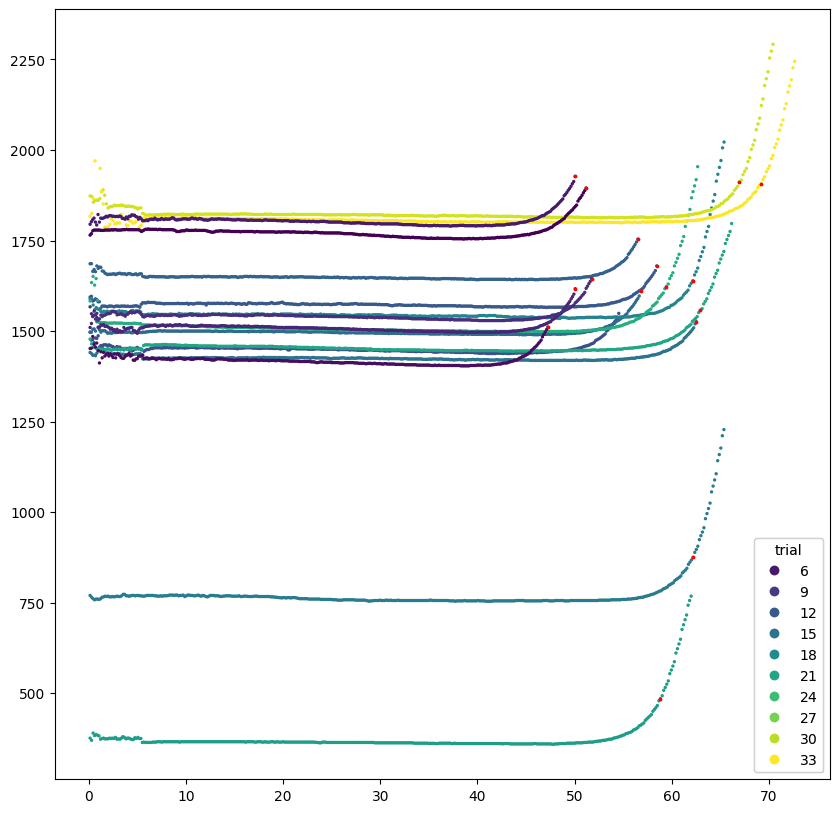

In [14]:
df_plot = df_cb[df_cb["C"] < 2600] # Remove irregular data points at the beginging
df_plot = df_plot[df_plot["Measured_time"].round() < 70]
df_measured_time = df_measured_time[df_measured_time["Measured_time"].round() < 70]
fig, ax = plt.subplots(figsize = (10,10)) # Setting subplot property
scatter = ax.scatter(df_plot.Time, df_plot.C, c=df_plot.trial, s = 2)
scatter_2 = ax.scatter(df_measured_time.Time, df_measured_time.C, c = "red", s = 3)
legend_c = ax.legend(*scatter.legend_elements(), loc="lower right", title="trial")
ax.add_artist(legend_c)
